In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
data=data.drop('CustomerID', axis=1)

In [5]:
print(data.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [6]:
data.shape

(200, 4)

In [10]:
from sklearn.preprocessing import StandardScaler
x=data[['Annual Income (k$)','Spending Score (1-100)']]
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
clus=model.fit(x)

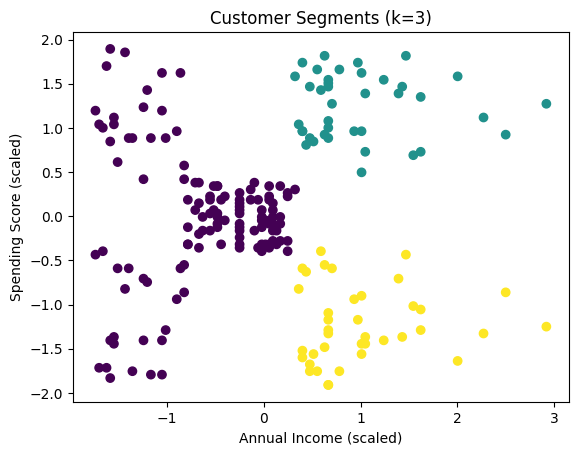

In [13]:
import matplotlib.pyplot as plt

labels = model.labels_
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments (k=3)')
plt.show()


Use Elbow Method to Choose Best k

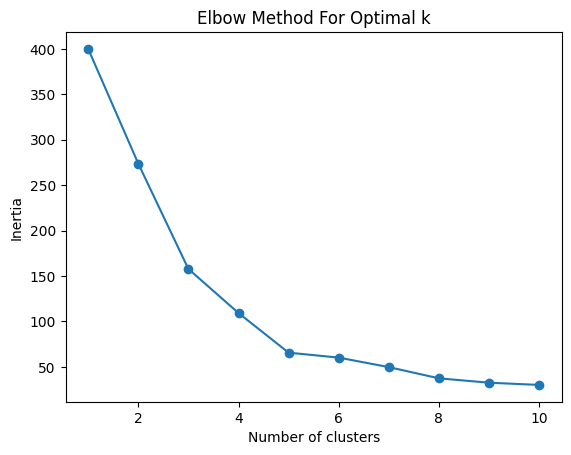

In [14]:
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [15]:
data['Cluster'] = model.labels_
print(data.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        0
1    Male   21                  15                      81        0
2  Female   20                  16                       6        0
3  Female   23                  16                      77        0
4  Female   31                  17                      40        0


In [ ]:
print(data.groupby('Cluster').mean(numeric_only=True))

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        40.325203           44.154472               49.829268
1        32.692308           86.538462               82.128205
2        40.394737           87.000000               18.631579


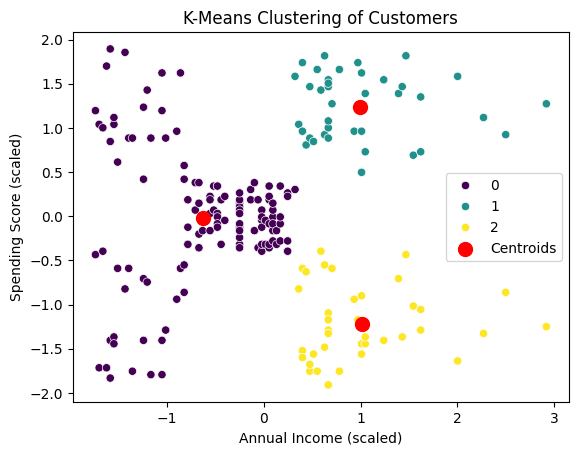

In [19]:
import seaborn as sns
import numpy as np

# Plot with labels
sns.scatterplot(x=x[:,0], y=x[:,1], hue=labels, palette='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, label='Centroids')
plt.legend()
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('K-Means Clustering of Customers')
plt.show()
